# Introduction to Linear Algebra and the world of probablitites

In this work-sheet, we shall do two activities. First of all we shall check the power of SVD. Then we shall check how may we generate data from an arbitrary distribution (given that we have the ability to generate data from a uniform distribution).

## Singular Value Decomposition
Lets load an image and try to do it's SVD.

Please note the way to access an image from your Google drive. Change the code accordingly (and load an image in your Google drive) to access to your own image!

Mark that we shall be using PIL's Image library, a useful set of powerful algorithms for image processing.


In [12]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

Lets load the image and convert that to a gray-scale version (so that we can treat it just like a 2D matrix). What will happen if its not gray-scale? 

It's not a single value anymore so single value decomposition won't work in this format (it expects a 2D matrix)

using local pc paths (easier), going to be working on 2 pictures simultaneously, sen-2 screenshots taken from GEE

the areas of interest are Krakow center as the urban area and some patch of land north of Hrubieszow in Lubelskie voivodeship as the rural area

In [13]:
img_miel = Image.open("miel.png")
imggray_miel = img_miel.convert('L')

img_czerm = Image.open("czerm.png")
imggray_czerm = img_czerm.convert('L')

C:\Users\kacpe\AppData\Local\Temp\ipykernel_7780\855339291.py:1: DeprecationWarning: Image.Image.getdata is deprecated and will be removed in Pillow 14 (2027-10-15). Use get_flattened_data instead.
  imgmat_miel = np.array(list(imggray_miel.getdata(band=0)), float)
C:\Users\kacpe\AppData\Local\Temp\ipykernel_7780\855339291.py:5: DeprecationWarning: Image.Image.getdata is deprecated and will be removed in Pillow 14 (2027-10-15). Use get_flattened_data instead.
  imgmat_czerm = np.array(list(imggray_czerm.getdata(band=0)), float)


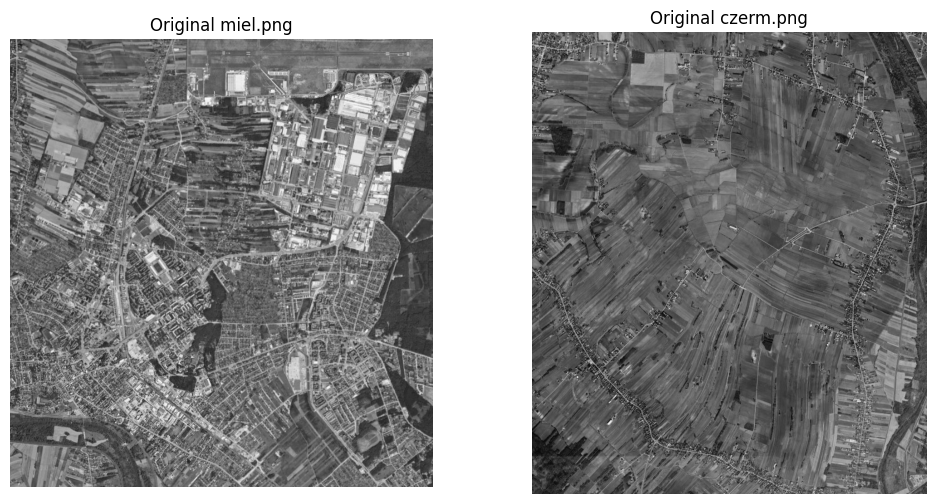

In [14]:
imgmat_miel = np.array(list(imggray_miel.getdata(band=0)), float)
imgmat_miel.shape = (imggray_miel.size[1], imggray_miel.size[0])
imgmat_miel = np.matrix(imgmat_miel)

imgmat_czerm = np.array(list(imggray_czerm.getdata(band=0)), float)
imgmat_czerm.shape = (imggray_czerm.size[1], imggray_czerm.size[0])
imgmat_czerm = np.matrix(imgmat_czerm)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original miel.png')
plt.imshow(imgmat_miel, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Original czerm.png')
plt.imshow(imgmat_czerm, cmap='gray')

### SVD

We can directly use the $svd$ command from Numpy to operate SVD on the matrix.

Lets first check how the image will look if we only use a single vector to reconstruct the image.

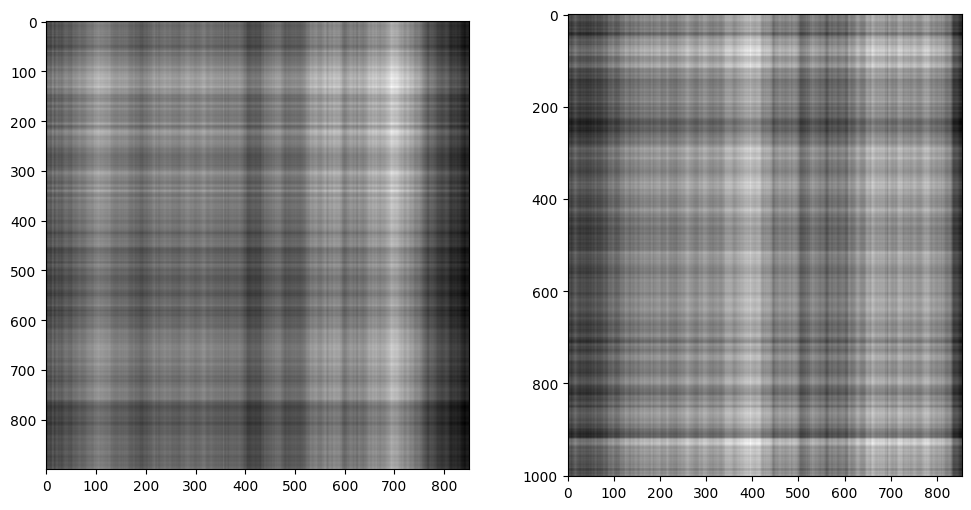

In [15]:
U_miel, sigma_miel, V_miel = np.linalg.svd(imgmat_miel)
reconstimg_miel = np.matrix(U_miel[:, :1]) * np.diag(sigma_miel[:1]) * np.matrix(V_miel[:1, :])

U_czerm, sigma_czerm, V_czerm = np.linalg.svd(imgmat_czerm)
reconstimg_czerm = np.matrix(U_czerm[:, :1]) * np.diag(sigma_czerm[:1]) * np.matrix(V_czerm[:1, :])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(reconstimg_miel, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(reconstimg_czerm, cmap='gray')


Now lets check how does the sigma vector look like.

What do you observe? The lines are a little less steep, meaning we have more complexity compared to the test image previously discussed in class.

How many vectors can we use to get a decent reconstruction of the image? For both sen-2 images, around 100 was the mark where it stopped being terrible.

What will happen if we omit the first 1-2 vectors (corresponding to the largest eigen values)?
The image gets blurry. In this instance, the fields did better than urban area, which did better than forests (those are barely recognizeable)

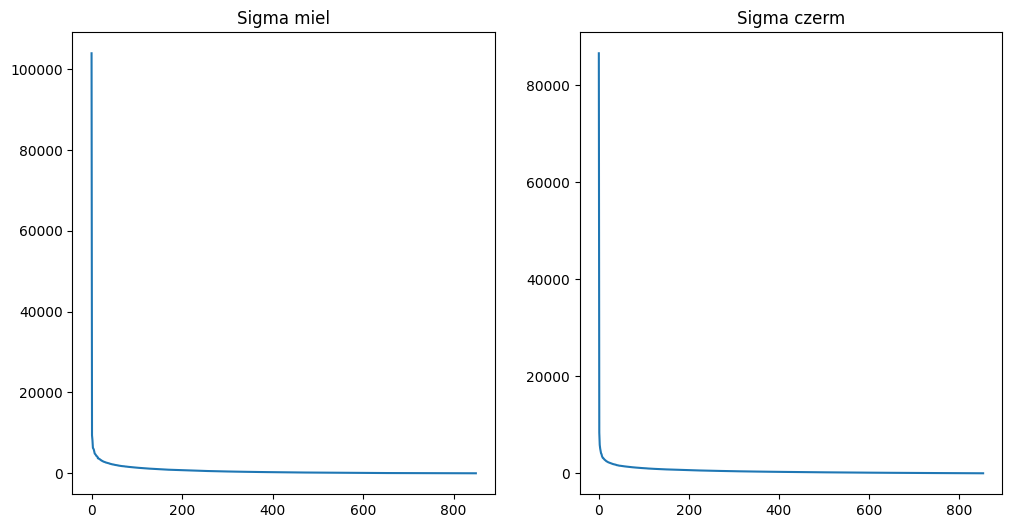

In [16]:
U_miel.shape
sigma_miel.shape
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Sigma miel')
plt.plot(sigma_miel)
plt.subplot(1, 2, 2)
plt.title('Sigma czerm')
plt.plot(sigma_czerm)

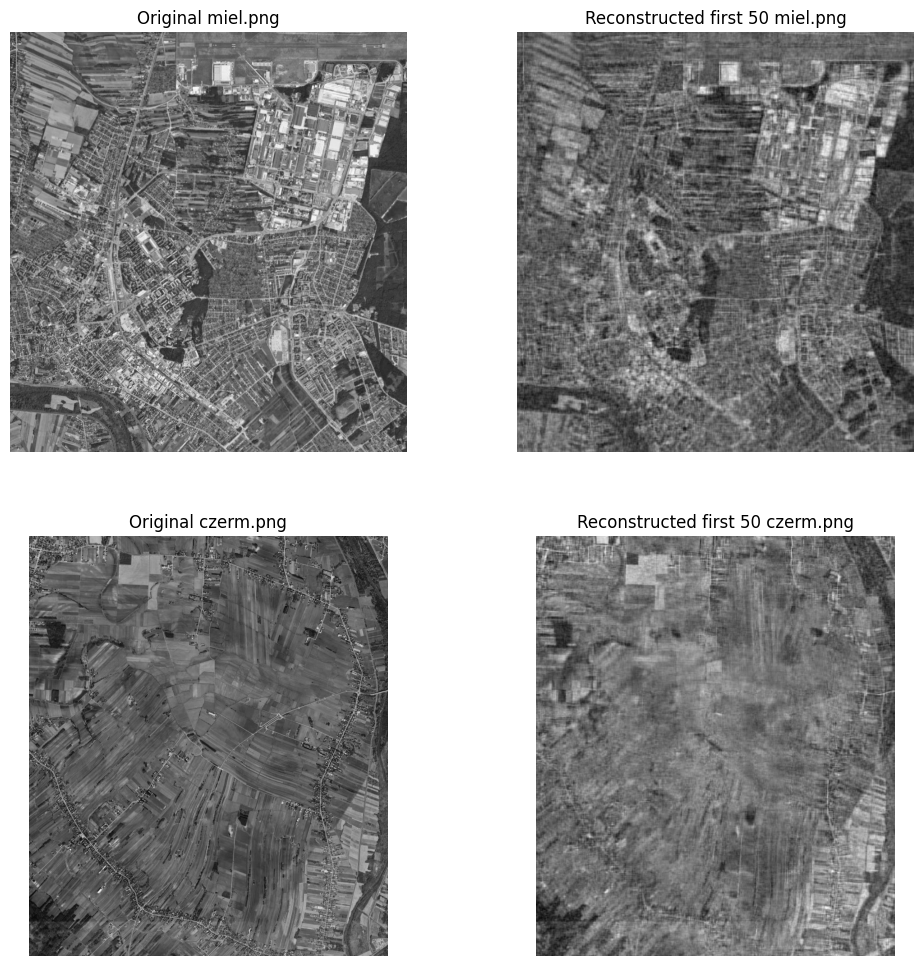

In [17]:
i = 50
j = 0
reconstimg_miel = np.matrix(U_miel[:, j:i]) * np.diag(sigma_miel[j:i]) * np.matrix(V_miel[j:i, :])
reconstimg_czerm = np.matrix(U_czerm[:, j:i]) * np.diag(sigma_czerm[j:i]) * np.matrix(V_czerm[j:i, :])
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Original miel.png')
plt.imshow(imgmat_miel, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Reconstructed first 50 miel.png')
plt.imshow(reconstimg_miel, cmap='gray')

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Original czerm.png')
plt.imshow(imgmat_czerm, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Reconstructed first 50 czerm.png')
plt.imshow(reconstimg_czerm, cmap='gray')


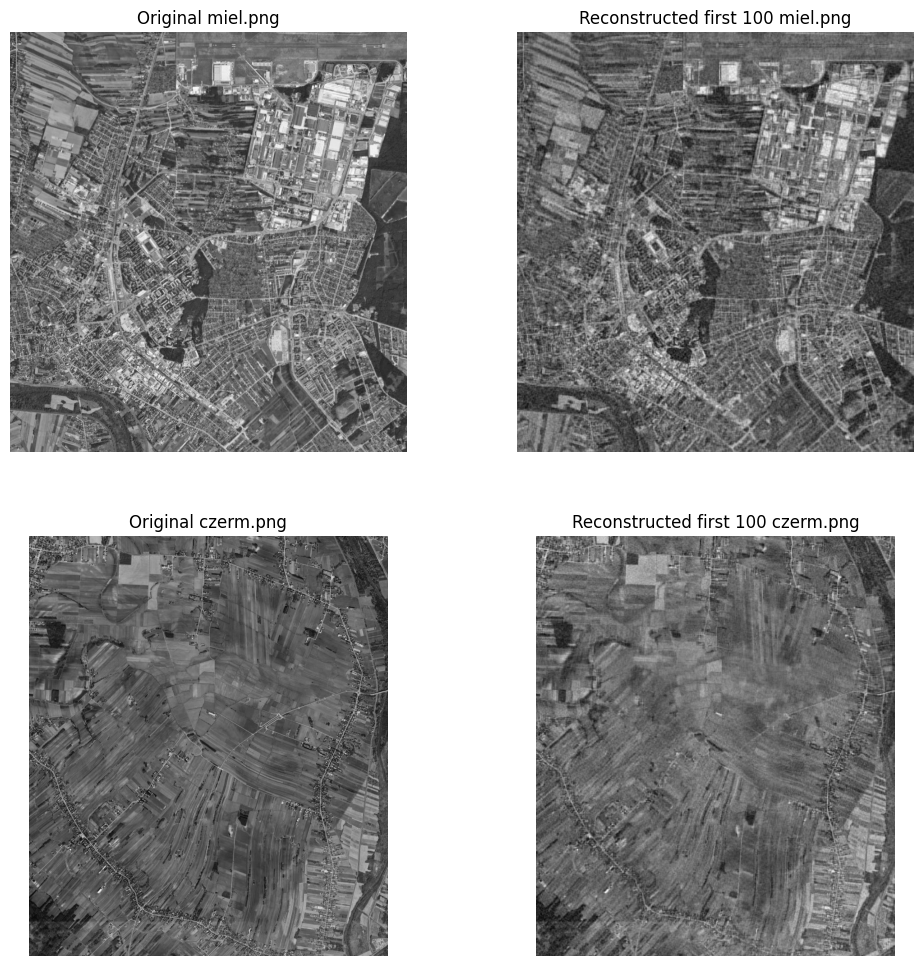

In [18]:
i = 100
j = 0
reconstimg_miel = np.matrix(U_miel[:, j:i]) * np.diag(sigma_miel[j:i]) * np.matrix(V_miel[j:i, :])
reconstimg_czerm = np.matrix(U_czerm[:, j:i]) * np.diag(sigma_czerm[j:i]) * np.matrix(V_czerm[j:i, :])
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Original miel.png')
plt.imshow(imgmat_miel, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Reconstructed first 100 miel.png')
plt.imshow(reconstimg_miel, cmap='gray')

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Original czerm.png')
plt.imshow(imgmat_czerm, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Reconstructed first 100 czerm.png')
plt.imshow(reconstimg_czerm, cmap='gray')


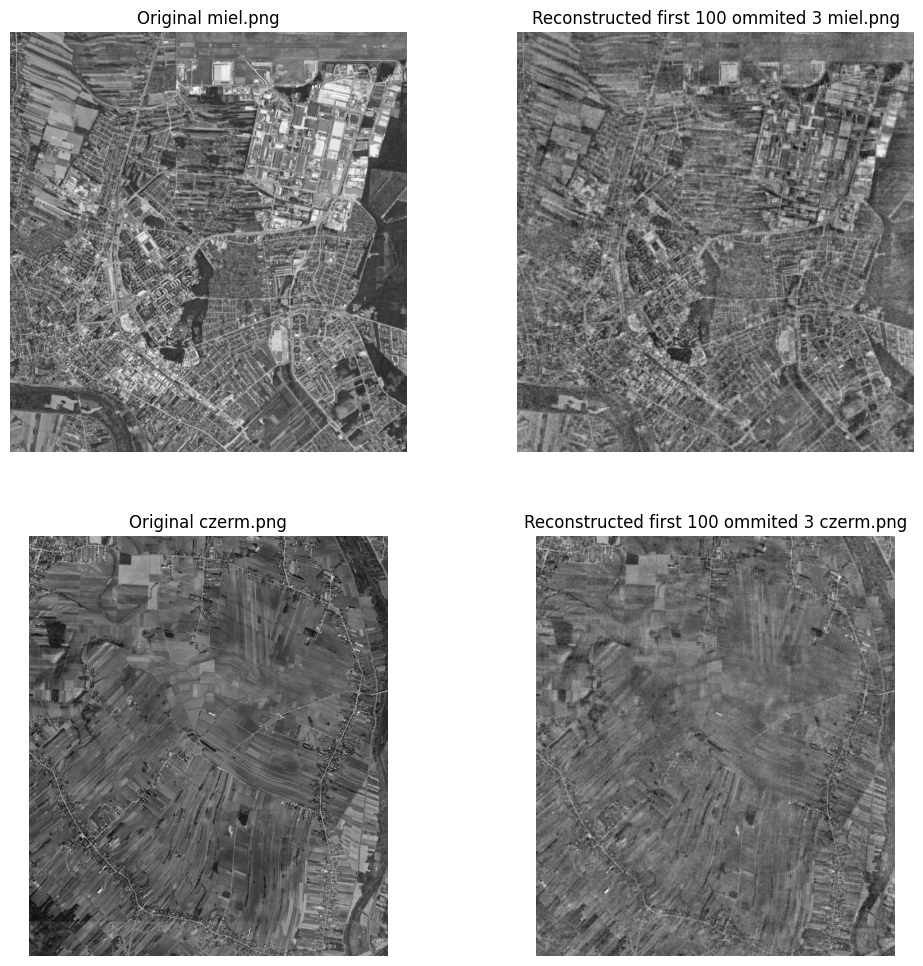

In [19]:
i = 100
j = 3
reconstimg_miel = np.matrix(U_miel[:, j:i]) * np.diag(sigma_miel[j:i]) * np.matrix(V_miel[j:i, :])
reconstimg_czerm = np.matrix(U_czerm[:, j:i]) * np.diag(sigma_czerm[j:i]) * np.matrix(V_czerm[j:i, :])
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Original miel.png')
plt.imshow(imgmat_miel, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Reconstructed first 100 ommited 3 miel.png')
plt.imshow(reconstimg_miel, cmap='gray')

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Original czerm.png')
plt.imshow(imgmat_czerm, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Reconstructed first 100 ommited 3 czerm.png')
plt.imshow(reconstimg_czerm, cmap='gray')


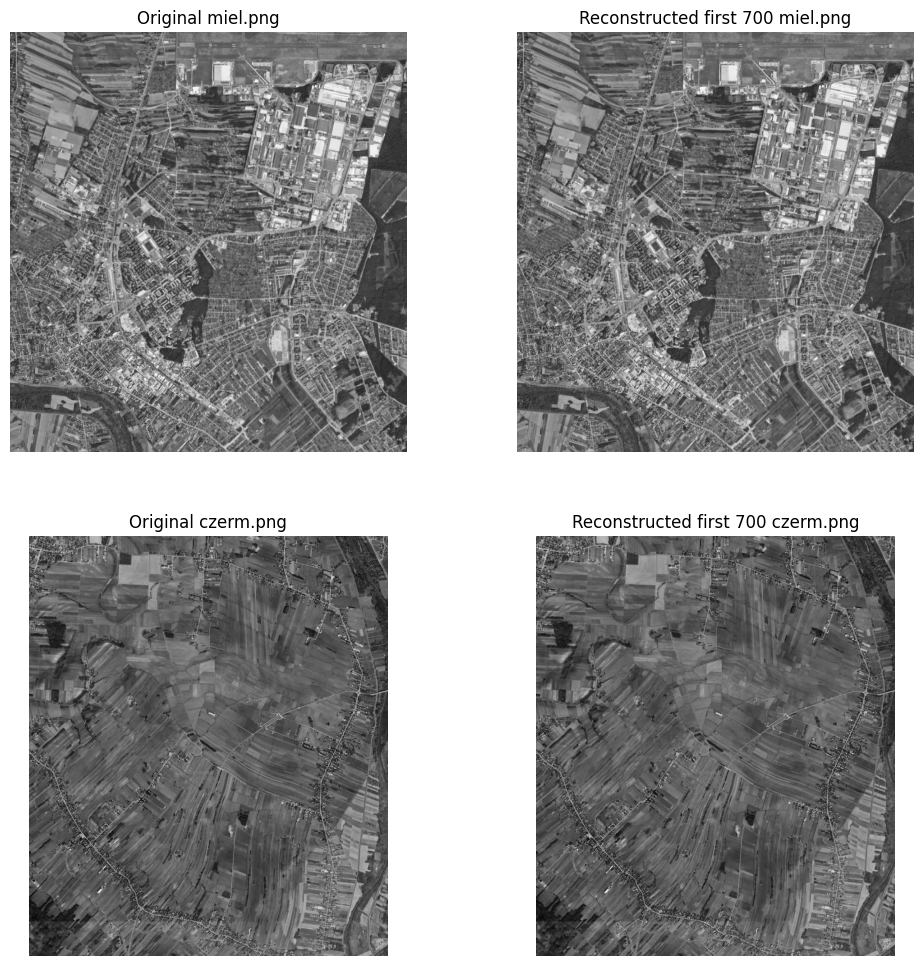

In [20]:
i = 700
j = 0
reconstimg_miel = np.matrix(U_miel[:, j:i]) * np.diag(sigma_miel[j:i]) * np.matrix(V_miel[j:i, :])
reconstimg_czerm = np.matrix(U_czerm[:, j:i]) * np.diag(sigma_czerm[j:i]) * np.matrix(V_czerm[j:i, :])
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Original miel.png')
plt.imshow(imgmat_miel, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Reconstructed first 700 miel.png')
plt.imshow(reconstimg_miel, cmap='gray')

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Original czerm.png')
plt.imshow(imgmat_czerm, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Reconstructed first 700 czerm.png')
plt.imshow(reconstimg_czerm, cmap='gray')